# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

## Overview

In [4]:
data = pd.read_csv("Marketing-Customer-Value-Analysis.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [6]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [7]:
#Chuyển cột Effective To Date về dạng datetime
data['Effective To Date'] = pd.to_datetime(data['Effective To Date'], errors='coerce')

# Kiểm tra lại kiểu dữ liệu của cột
print(data['Effective To Date'].dtype)

datetime64[ns]


C:\Users\HP\AppData\Local\Temp\ipykernel_28636\2189909194.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Effective To Date'] = pd.to_datetime(data['Effective To Date'], errors='coerce')


In [8]:
# Xác định giá trị min và max của cột 'Effective To Date'
min_date = data['Effective To Date'].min()
max_date = data['Effective To Date'].max()

# In ra kết quả
print(f"Min date: {min_date}")
print(f"Max date: {max_date}")

Min date: 2011-01-01 00:00:00
Max date: 2011-02-28 00:00:00


In [9]:
#Thêm cột 'Effective Days Left', tính số ngày chênh lệch so với ngày hết hợp đồng gần nhất (1/1/2011)
#Tính giá trị min của cột 'Effective To Date'
min_date = data['Effective To Date'].min()

#Tạo cột 'Effective Days Left' tính số ngày giữa 'Effective To Date' và giá trị min_date
data['Effective Days Left'] = (data['Effective To Date'] - min_date).dt.days

#In ra kết quả để kiểm tra
print(data[['Effective To Date', 'Effective Days Left']].head())

  Effective To Date  Effective Days Left
0        2011-02-24                   54
1        2011-01-31                   30
2        2011-02-19                   49
3        2011-01-20                   19
4        2011-02-03                   33


In [14]:
# Kiểm tra các dòng trùng lặp
duplicate_rows = data[data.duplicated()]

print("Trùng lặp dòng:")
print(duplicate_rows)

# Kiểm tra số lượng dòng trùng lặp
print("\nSố lượng dòng trùng lặp:")
print(duplicate_rows.shape[0])

Trùng lặp dòng:
Empty DataFrame
Columns: [Customer, State, Customer Lifetime Value, Response, Coverage, Education, Effective To Date, EmploymentStatus, Gender, Income, Location Code, Marital Status, Monthly Premium Auto, Months Since Last Claim, Months Since Policy Inception, Number of Open Complaints, Number of Policies, Policy Type, Policy, Renew Offer Type, Sales Channel, Total Claim Amount, Vehicle Class, Vehicle Size, Effective Days Left]
Index: []

[0 rows x 25 columns]

Số lượng dòng trùng lặp:
0


In [19]:
#Kiểm tra dữ liệu bị miss
missing_data = data.isnull().sum()
print(missing_data[missing_data > 0])

Series([], dtype: int64)


In [21]:
data.describe(include='all')

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Effective Days Left
count,9134,9134,9134.000000,9134,9134,9134,9134,9134,9134,9134.000000,...,9134.000000,9134.000000,9134,9134,9134,9134,9134.000000,9134,9134,9134.000000
unique,9134,5,NaN,2,3,5,NaN,5,2,NaN,...,NaN,NaN,3,9,4,4,NaN,6,3,NaN
top,BU79786,California,NaN,No,Basic,Bachelor,NaN,Employed,F,NaN,...,NaN,NaN,Personal Auto,Personal L3,Offer1,Agent,NaN,Four-Door Car,Medsize,NaN
freq,1,3150,NaN,7826,5568,2748,NaN,5698,4658,NaN,...,NaN,NaN,6788,3426,3752,3477,NaN,4621,6424,NaN
mean,NaN,NaN,8004.940475,NaN,NaN,NaN,2011-01-29 20:06:21.519597056,NaN,NaN,37657.380009,...,0.384388,2.966170,NaN,NaN,NaN,NaN,434.088794,NaN,NaN,28.837749
min,NaN,NaN,1898.007675,NaN,NaN,NaN,2011-01-01 00:00:00,NaN,NaN,0.000000,...,0.000000,1.000000,NaN,NaN,NaN,NaN,0.099007,NaN,NaN,0.000000
25%,NaN,NaN,3994.251794,NaN,NaN,NaN,2011-01-15 00:00:00,NaN,NaN,0.000000,...,0.000000,1.000000,NaN,NaN,NaN,NaN,272.258244,NaN,NaN,14.000000
50%,NaN,NaN,5780.182197,NaN,NaN,NaN,2011-01-29 00:00:00,NaN,NaN,33889.500000,...,0.000000,2.000000,NaN,NaN,NaN,NaN,383.945434,NaN,NaN,28.000000
75%,NaN,NaN,8962.167041,NaN,NaN,NaN,2011-02-13 00:00:00,NaN,NaN,62320.000000,...,0.000000,4.000000,NaN,NaN,NaN,NaN,547.514839,NaN,NaN,43.000000
max,NaN,NaN,83325.381190,NaN,NaN,NaN,2011-02-28 00:00:00,NaN,NaN,99981.000000,...,5.000000,9.000000,NaN,NaN,NaN,NaN,2893.239678,NaN,NaN,58.000000


In [23]:
#Kiểm tra dữ liệu có bị mất cân bằng hay không (classification)
data['Response'].value_counts()

Response
No     7826
Yes    1308
Name: count, dtype: int64

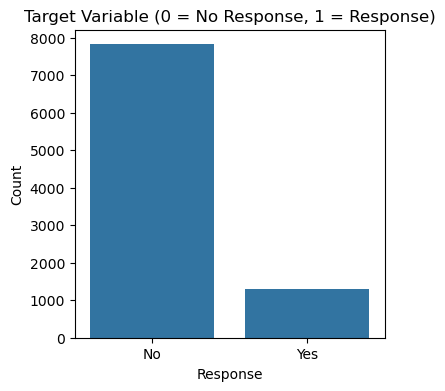

Percentage Distribution:
 Response
No     85.679877
Yes    14.320123
Name: proportion, dtype: float64


In [25]:
# Plotting a count plot for the "target" column
plt.figure(figsize=(4, 4))
sns.countplot(x='Response', data=data)
plt.title('Target Variable (0 = No Response, 1 = Response)')
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()

# Tính tỷ lệ phần trăm
percentages = data['Response'].value_counts(normalize=True) * 100
print("Percentage Distribution:\n", percentages)

## Biến liên tục

In [28]:
#Lọc ra các feature có dạng biến liên tục
numerical_features_check = data.select_dtypes(include=[np.number]).columns
numerical_features_check

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount',
       'Effective Days Left'],
      dtype='object')

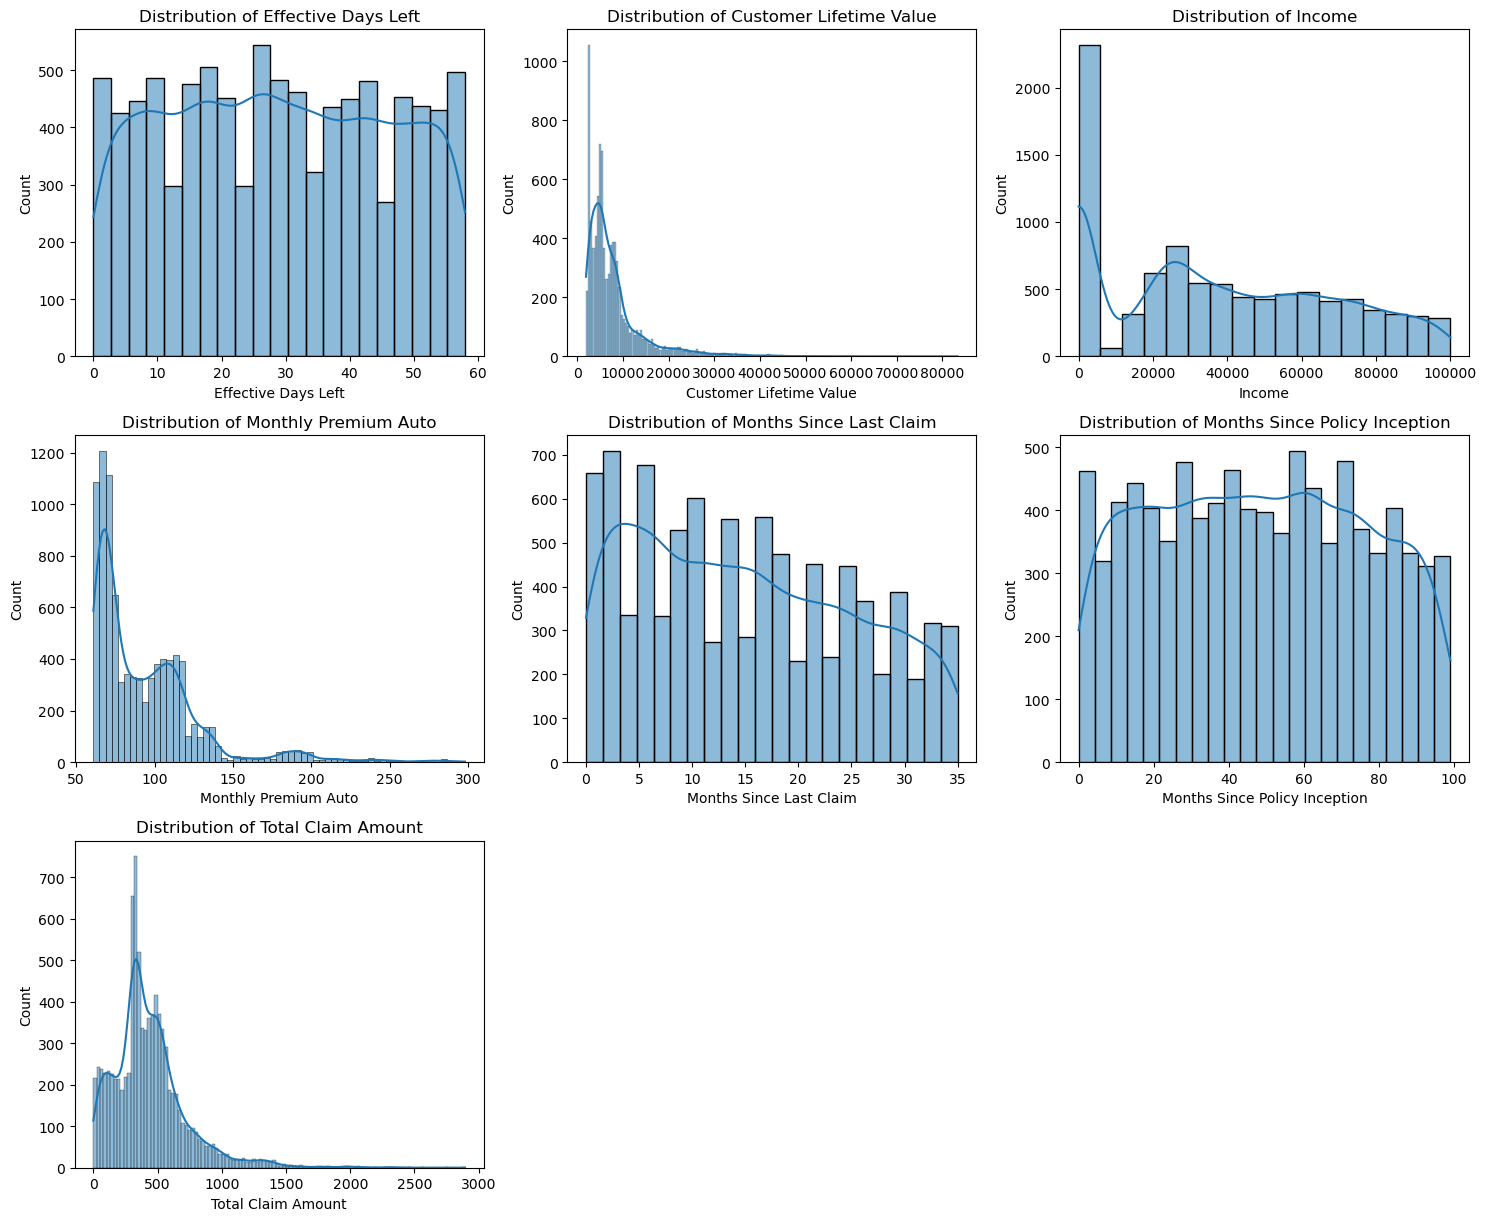

In [30]:
#Phân phối của từng biến liên tục

#Danh sách các biến thật sự là biến liên tục
numerical_features = ['Effective Days Left','Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Total Claim Amount']

plt.figure(figsize=(15, 20))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(5, 3, i)
    sns.histplot(data[feature], kde=True)
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()

In [31]:
#Đếm số giá trị = 0 trong các cột thuộc numerical_features
zero_counts = (data[numerical_features] == 0).sum()
print(zero_counts[zero_counts > 0])

Effective Days Left               148
Income                           2317
Months Since Last Claim           314
Months Since Policy Inception      83
dtype: int64


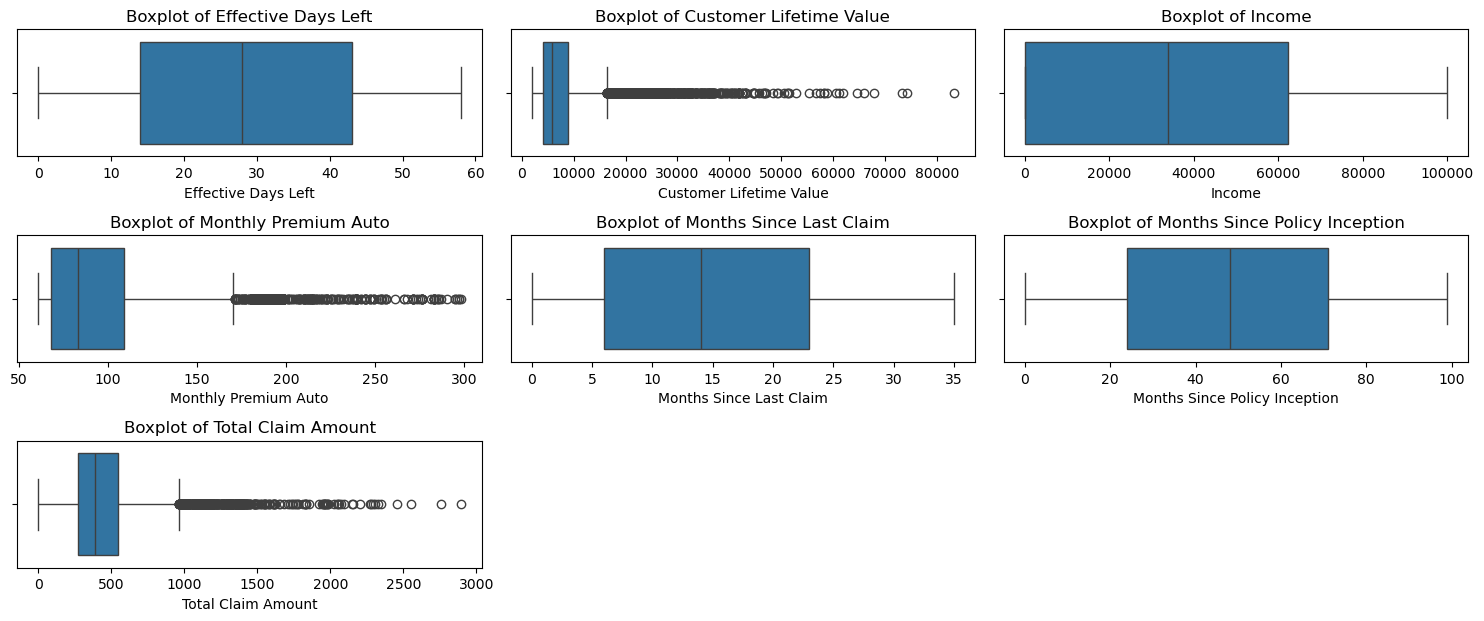

In [32]:
#Phân phối và outliers của features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(x=data[feature])
    plt.title(f"Boxplot of {feature}")
plt.tight_layout()
plt.show()

In [33]:
#Đếm số lượng outliers (nếu có)
def calculate_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    #Xác định outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    num_outliers = len(outliers)

    #Tính tỷ lệ outliers
    outlier_ratio = num_outliers / len(df) * 100

    return num_outliers, outlier_ratio

#Tính số lượng và tỷ lệ outliers cho các cột numerical
outlier_counts = {
    variable: calculate_outliers(data, variable) for variable in numerical_features
}

#Hiển thị kết quả
for variable, (num_outliers, outlier_ratio) in outlier_counts.items():
    print(f"{variable}: {num_outliers} outliers ({outlier_ratio:.2f}%)")

# Có 3 feature 'Customer Lifetime Value', 'Monthly Premium Auto', 'Total Claim Amount' có tỉ lệ outliers khá cao, tiếp tục xem mối tương quan của
# các feature này với target ở boxplot để quyết định có xử lý outliers hay không

Effective Days Left: 0 outliers (0.00%)
Customer Lifetime Value: 817 outliers (8.94%)
Income: 0 outliers (0.00%)
Monthly Premium Auto: 430 outliers (4.71%)
Months Since Last Claim: 0 outliers (0.00%)
Months Since Policy Inception: 0 outliers (0.00%)
Total Claim Amount: 453 outliers (4.96%)


## Biến phân loại

In [35]:
#Lọc ra các feature có dạng biến phân loại
categorical_features_check = data.select_dtypes(include=['object']).columns
categorical_features_check

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

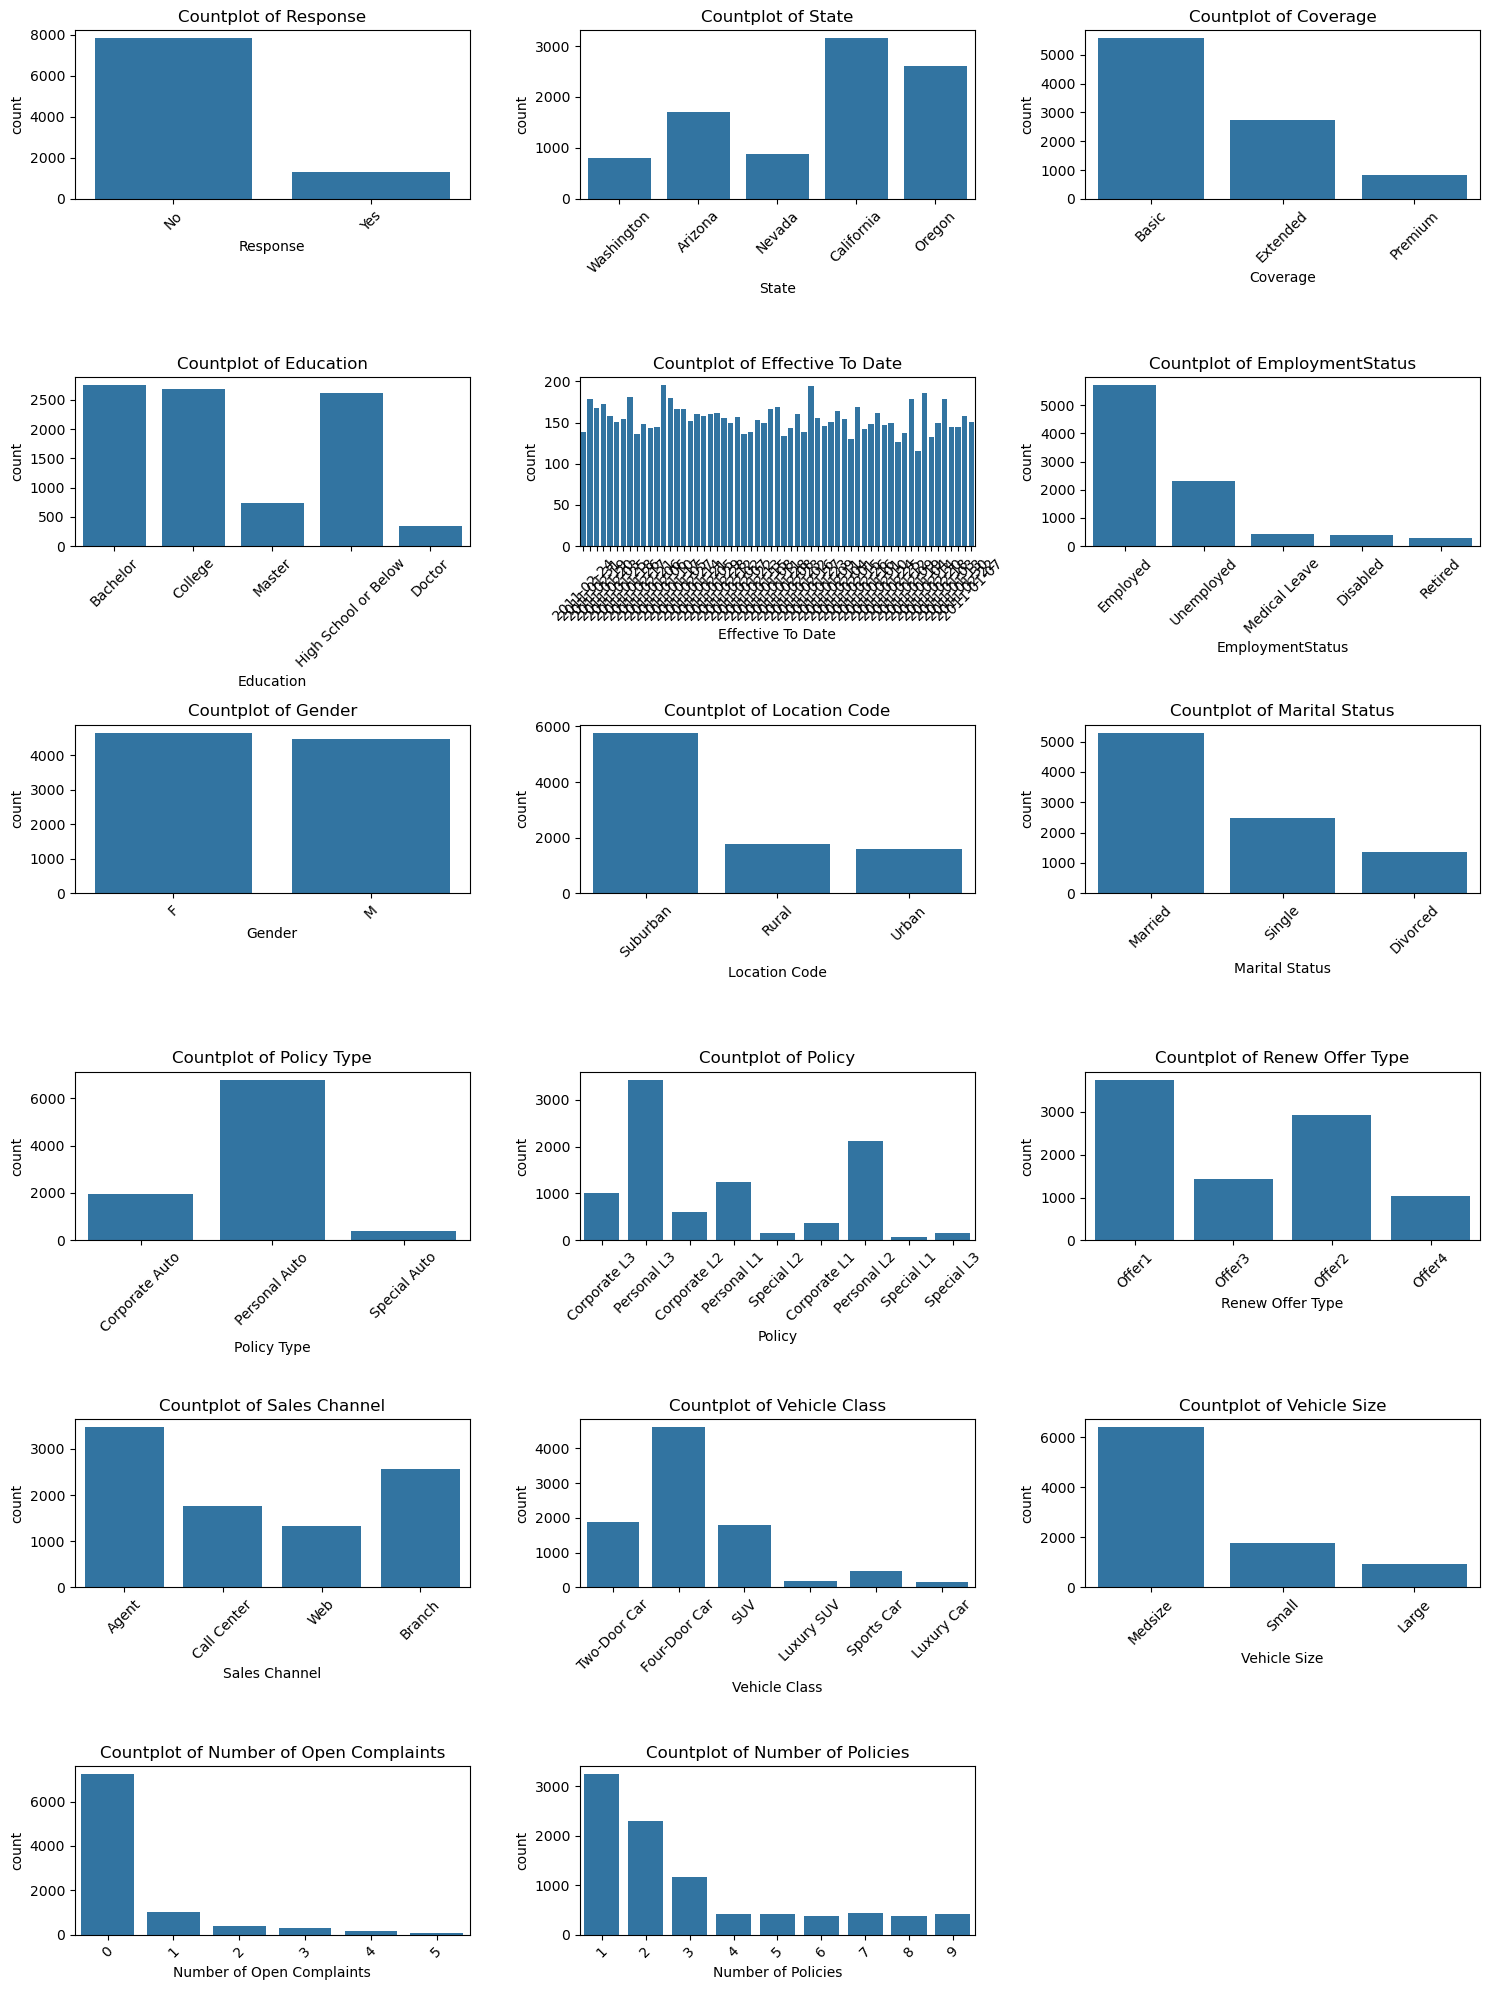

In [38]:
#Mối tương quan giữa các feature categorical

#Danh sách các biến thật sự là biến phân loại (chỉ tính các biến cân nhắc có mối tương quan với target)
categorical_features = ['Response', 'State', 'Coverage', 'Education', 'Effective To Date', 'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
                        'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size', 'Number of Open Complaints', 'Number of Policies']

plt.figure(figsize=(15, 20))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(6, 3, i)
    sns.countplot(x=data[feature])
    plt.title(f"Countplot of {feature}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Mối tương quan giữa các biến

### Biến liên tục với biến liên tục

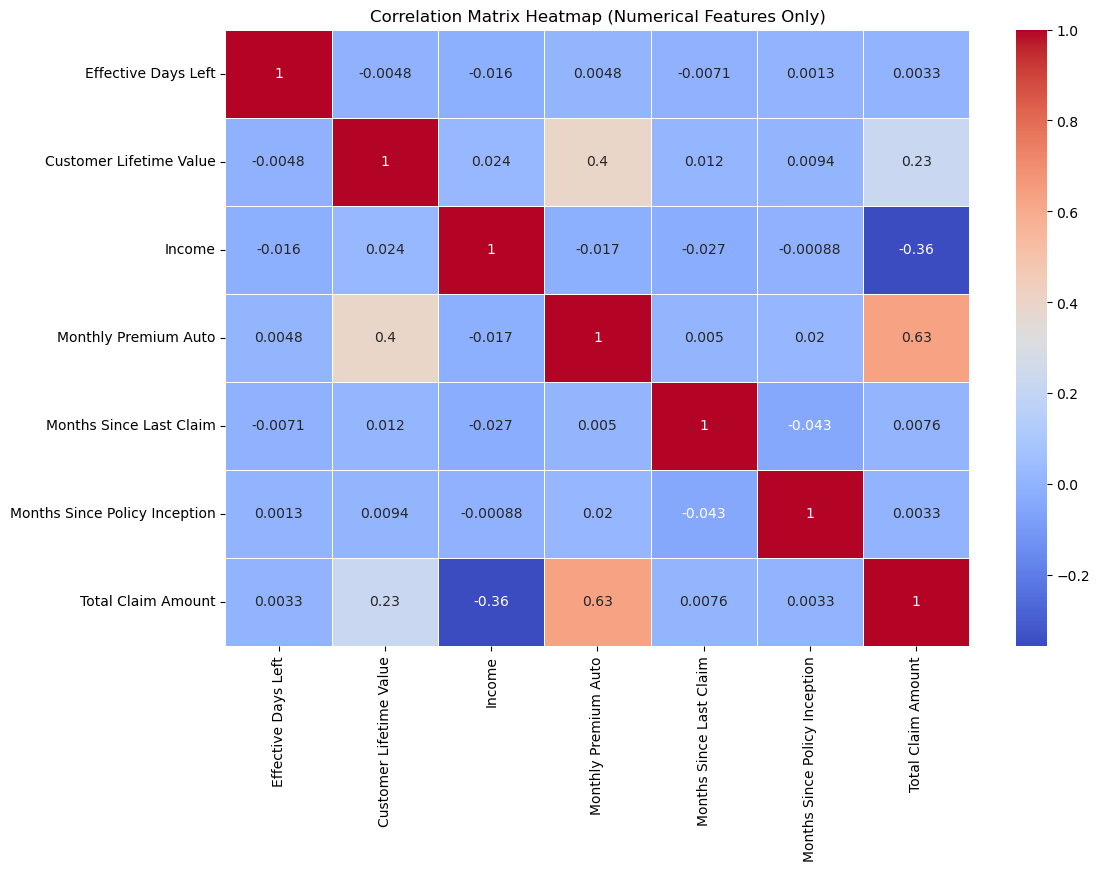

In [41]:
#Mối tương quan giữa các feature numerical
correlation_matrix = data[numerical_features].corr()

#Visualize correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap (Numerical Features Only)")
plt.show()

<Figure size 500x500 with 0 Axes>

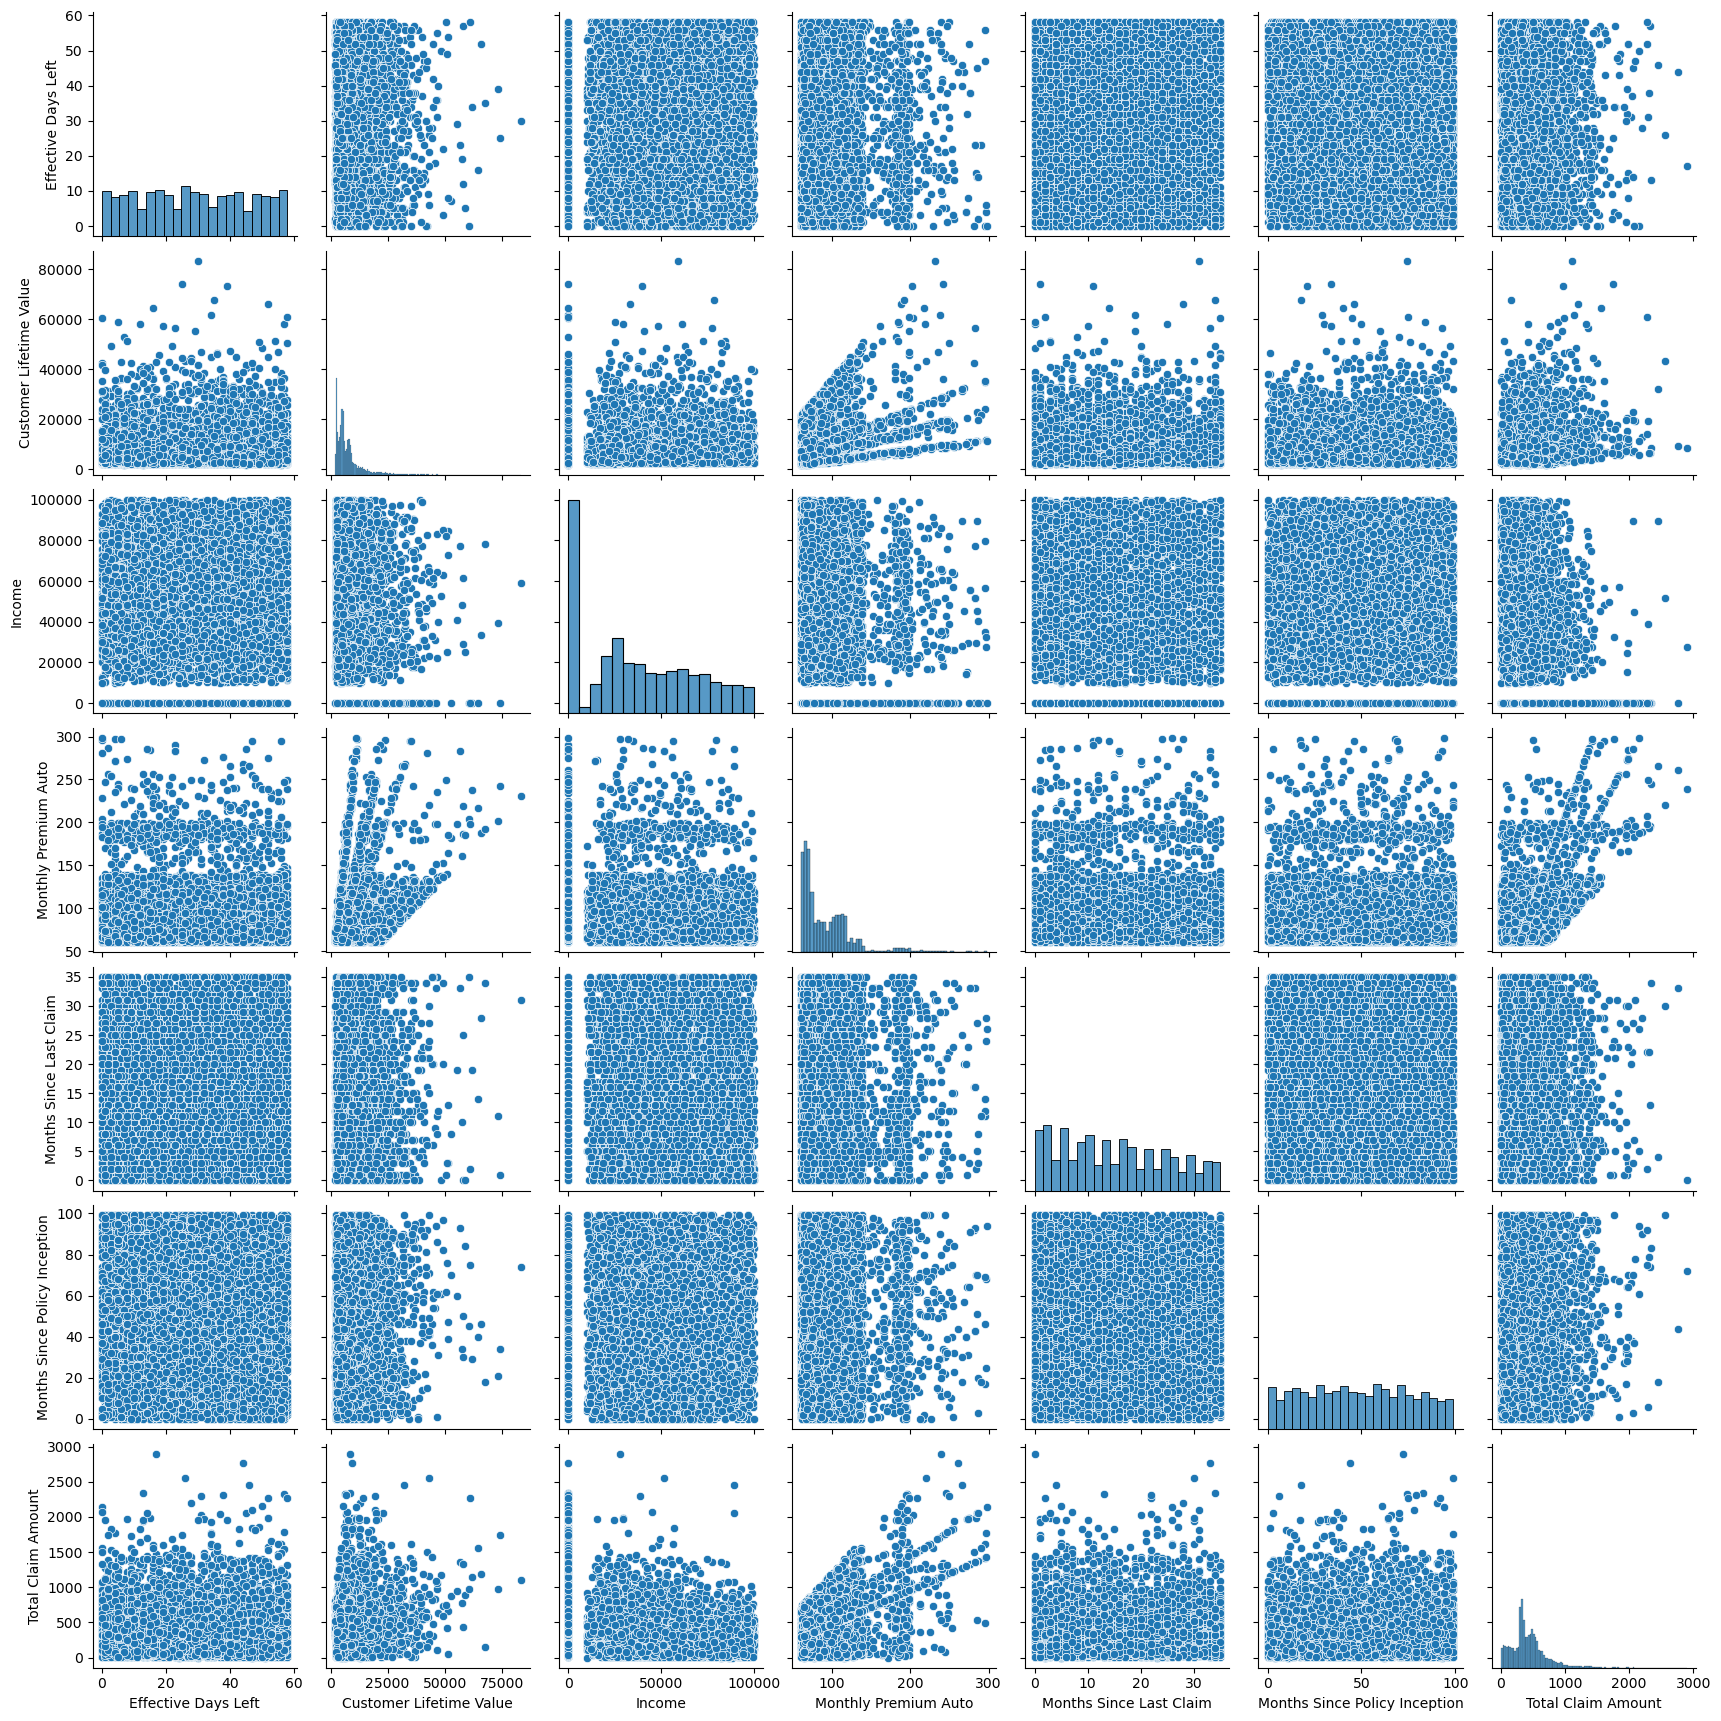

In [42]:
# Plotting pair plots to examine relationships between continuous variables
plt.figure(figsize=(5, 5))
sns.pairplot(data[numerical_features])
plt.show()

### Biến phân loại (target) với biến phân loại

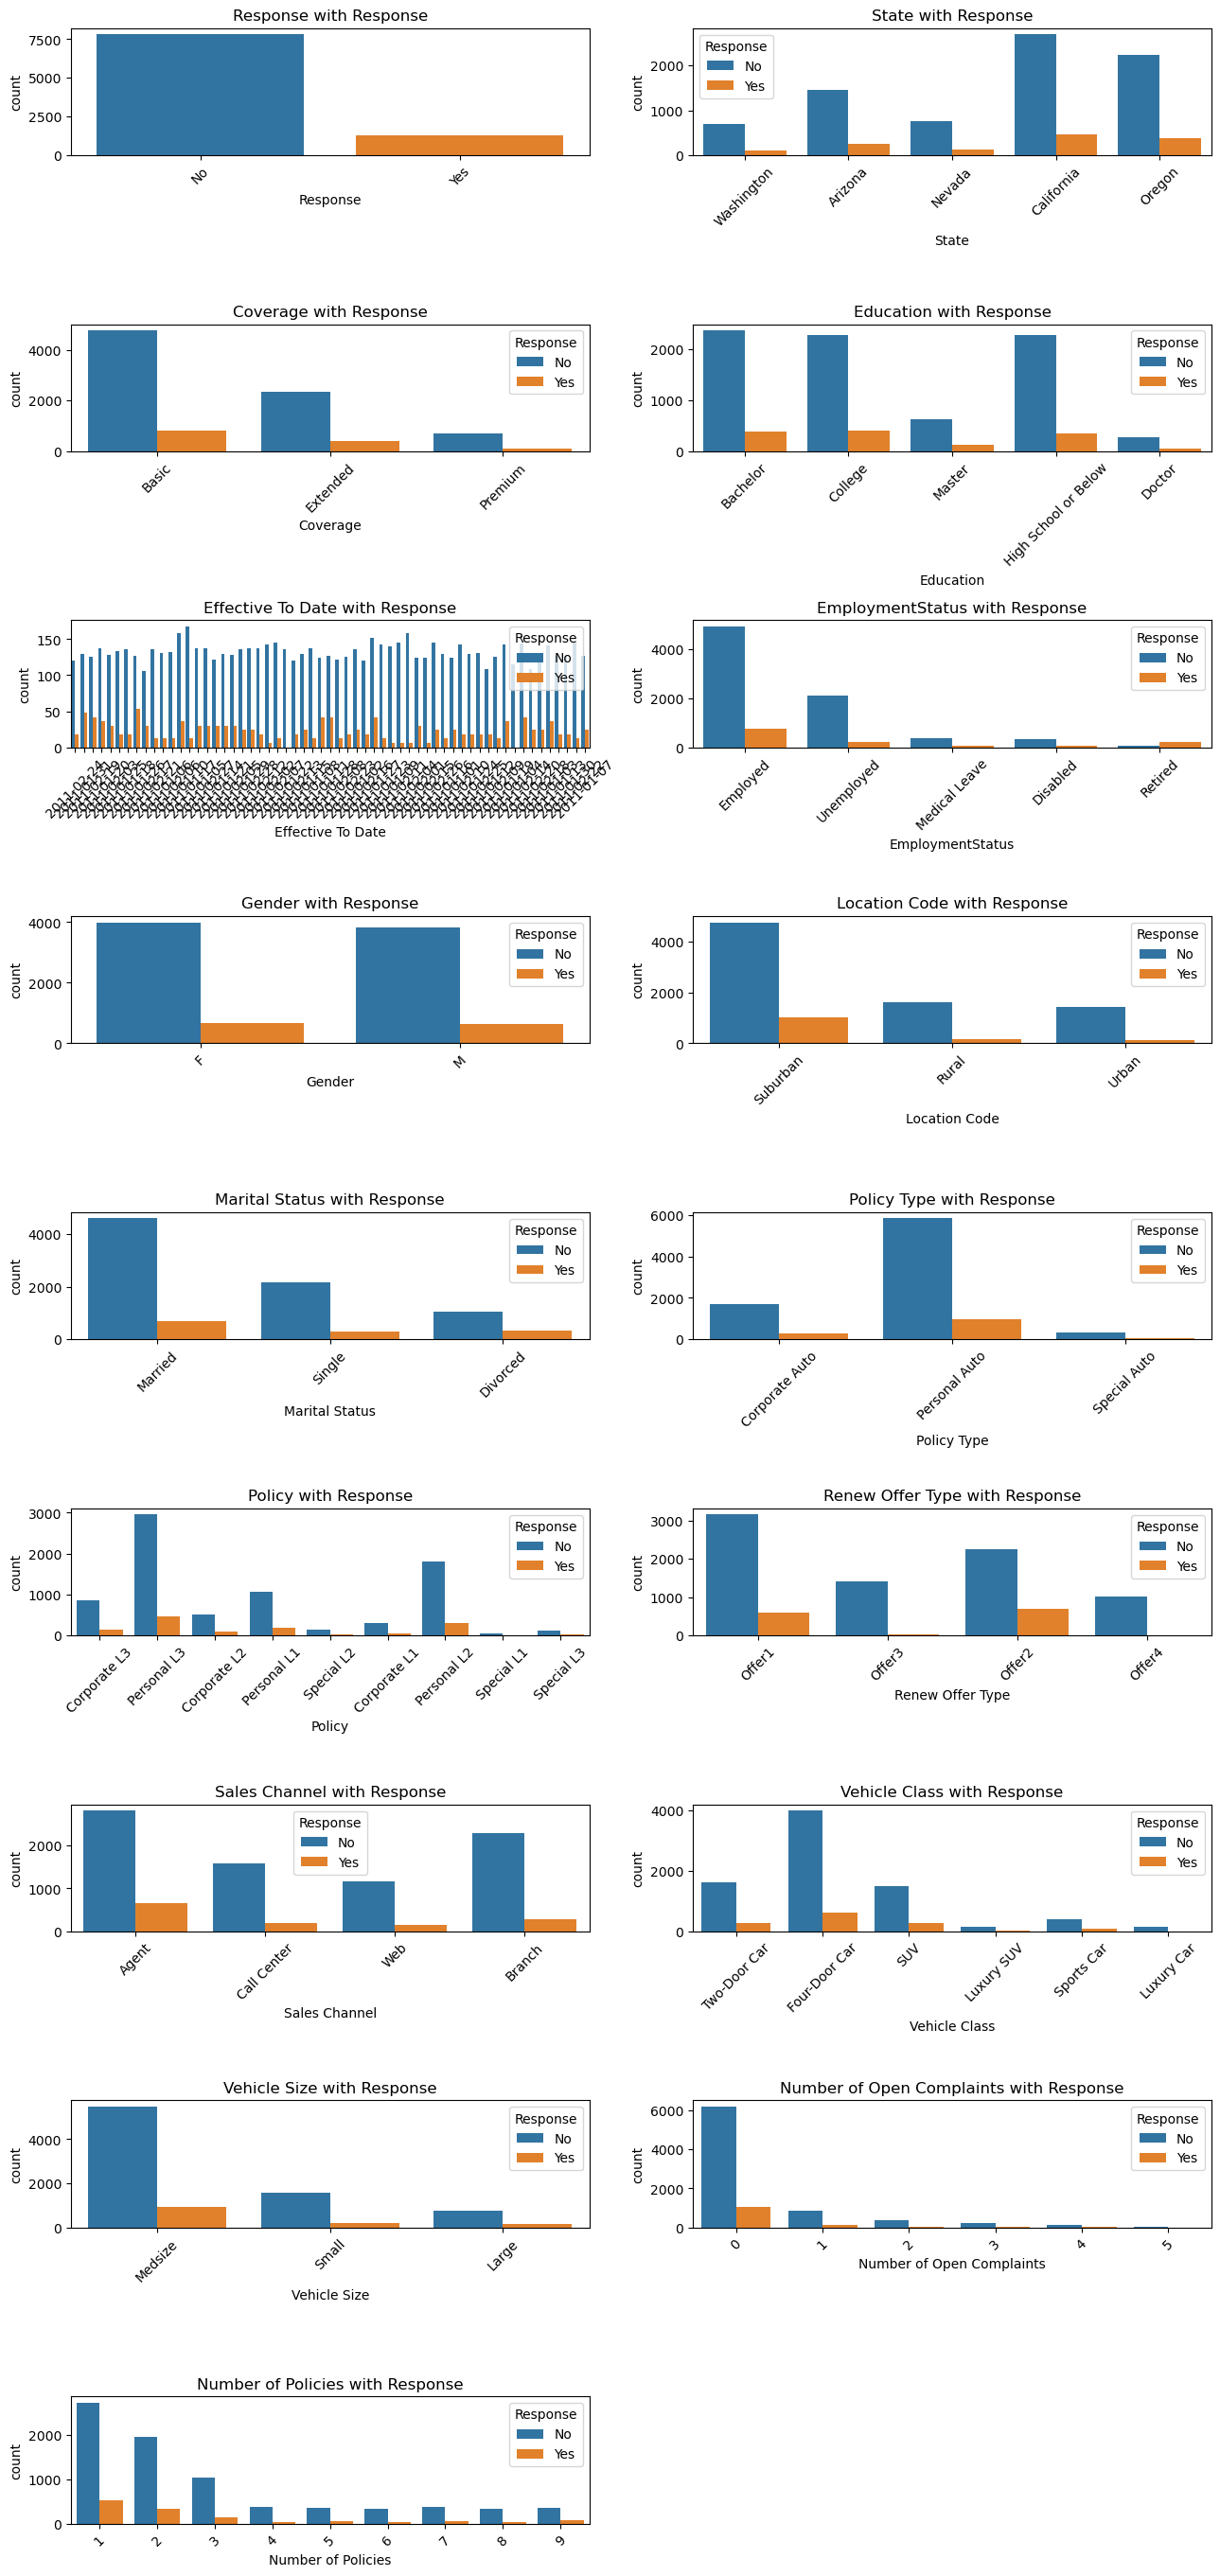

In [47]:
# Plotting count plots to visualize the relationship between "Target" and each of the other categorical variables
plt.figure(figsize=(13, 30))

for i, variable in enumerate(categorical_features):
    plt.subplot(10, 2, i + 1)
    ax = sns.countplot(x=variable, hue='Response', data=data)
    plt.title(f"{variable} with Response")

    # Xoay nhãn trục x 45 độ
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

plt.tight_layout()
plt.show()

In [48]:
# Xem cụ thể tỉ lệ giữa các lớp của Response (target) giữa các biến trong từng categorical feature
# Tạo một dictionary để lưu kết quả
ratios_by_column = {}

# Lặp qua từng cột trong danh sách categorical_features
for column in categorical_features:
    # Tính số lượng đếm cho từng giá trị của cột và các lớp trong 'Response'
    counts = data.groupby([column, 'Response']).size().unstack().fillna(0)

    # Tính tổng số đếm cho mỗi giá trị của cột
    total_counts = counts.sum(axis=1)

    # Tính tỉ lệ phần trăm
    counts['Ratio_Class_No'] = counts['No'] / total_counts
    counts['Ratio_Class_Yes'] = counts['Yes'] / total_counts
    counts = counts.fillna(0)  # Điền giá trị 0 nếu tổng bằng 0

    # Lưu kết quả vào dictionary
    ratios_by_column[column] = counts[['Ratio_Class_No', 'Ratio_Class_Yes']]

# In kết quả cho từng cột
for column, result in ratios_by_column.items():
    print(f"Column: {column}")
    print(result)
    print("\n")

Column: Response
Response  Ratio_Class_No  Ratio_Class_Yes
Response                                 
No                   1.0              0.0
Yes                  0.0              1.0


Column: State
Response    Ratio_Class_No  Ratio_Class_Yes
State                                      
Arizona           0.857311         0.142689
California        0.855238         0.144762
Nevada            0.859410         0.140590
Oregon            0.855440         0.144560
Washington        0.863409         0.136591


Column: Coverage
Response  Ratio_Class_No  Ratio_Class_Yes
Coverage                                 
Basic           0.856681         0.143319
Extended        0.857768         0.142232
Premium         0.854369         0.145631


Column: Education
Response              Ratio_Class_No  Ratio_Class_Yes
Education                                            
Bachelor                    0.862445         0.137555
College                     0.847818         0.152182
Doctor                    

### Biến phân loại (target) với biến liên tục

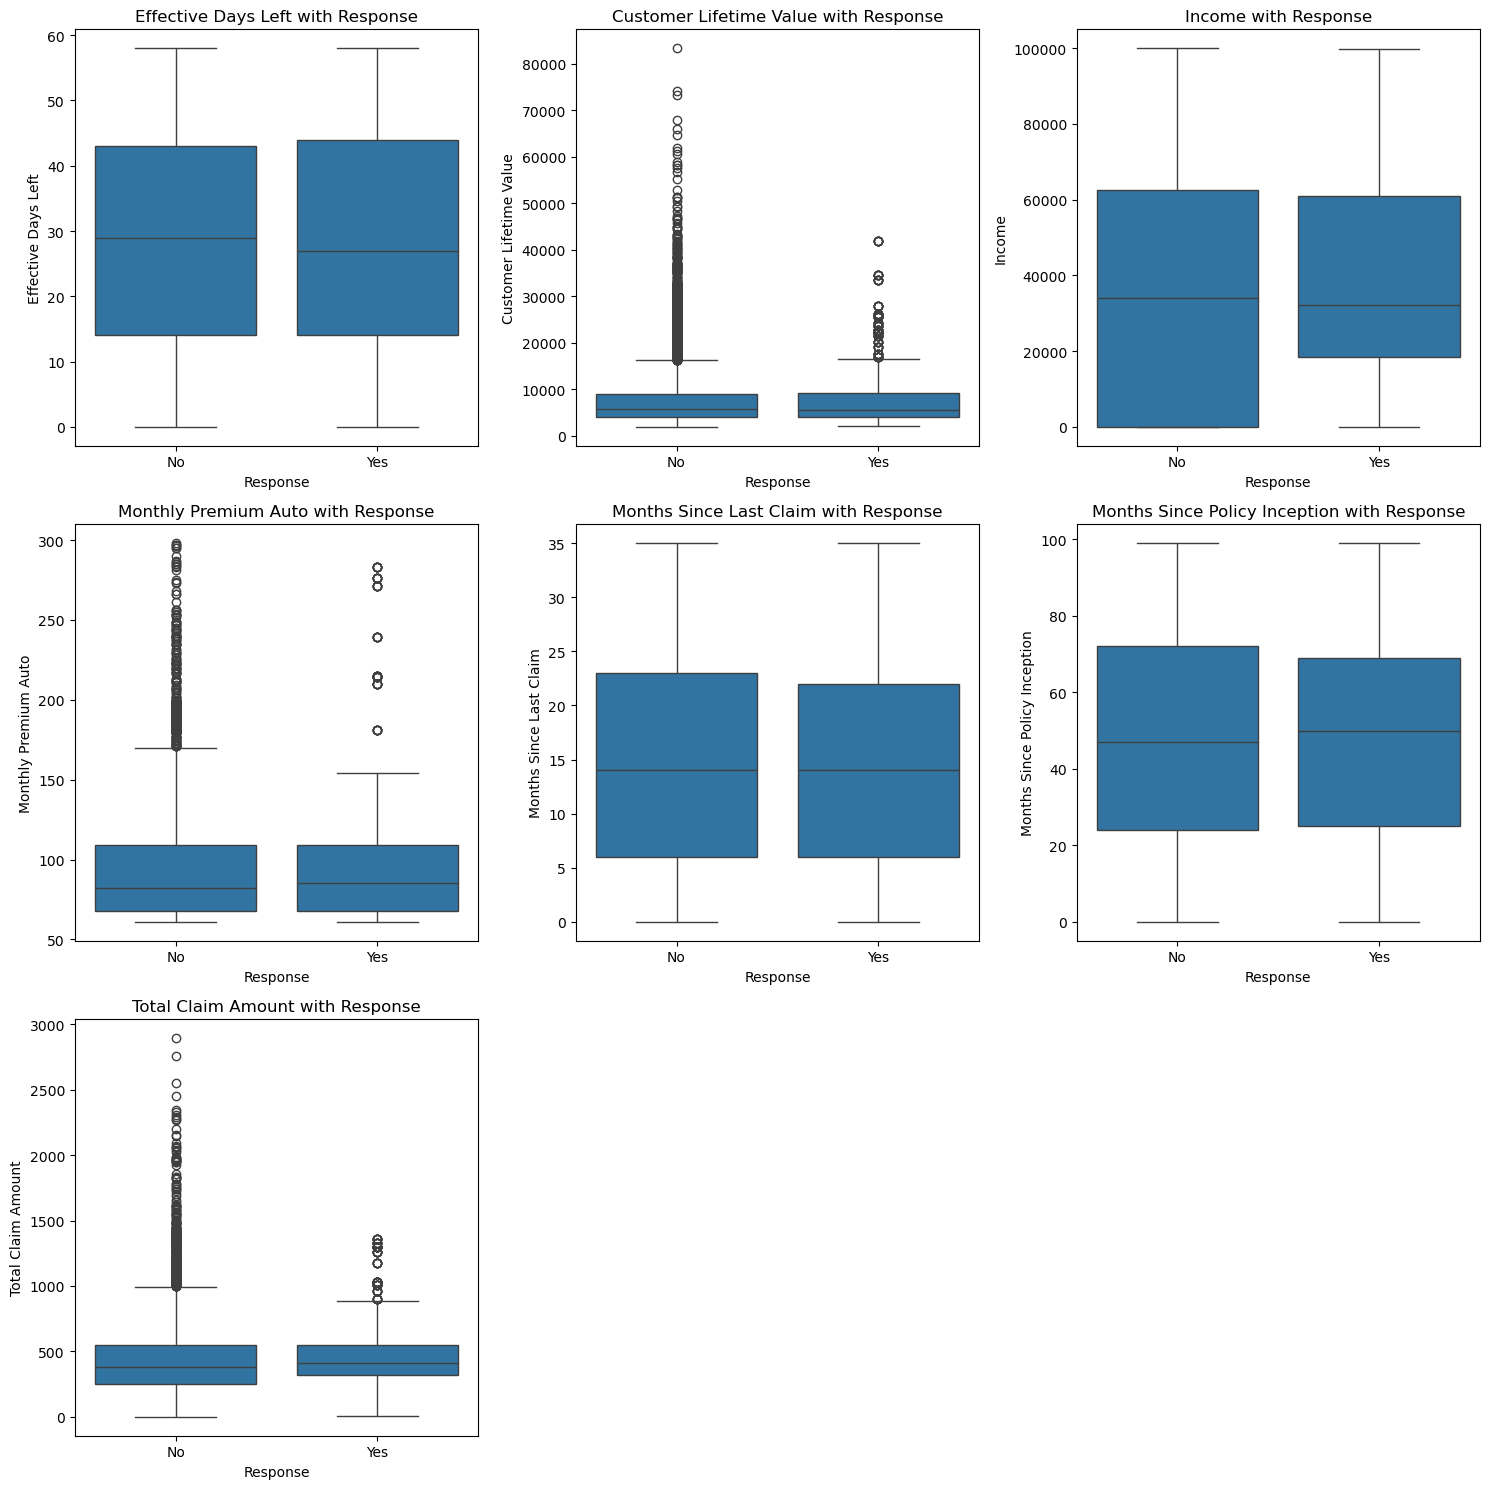

In [50]:
#Mối tương quan giữa các feature categorical với numerical
plt.figure(figsize=(15, 15))
for i, variable in enumerate(numerical_features[:10]):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='Response', y=variable, data= data)
    plt.title(f"{variable} with Response")
plt.tight_layout()
plt.show()

# Insights

I. Tổng quát
1. Dữ liệu không bị trùng và bị thiếu.
2. Dữ liệu có sự mất cân bằng với cột Response (target) với No chiếm 85.68% và Yes chỉ chiếm 14.32%. Với tỷ lệ này, mô hình Logistic Regression có thể không hoạt động tốt vì nó thường dự đoán lớp chiếm đa số và bỏ qua lớp chiếm thiểu số -> thực hiện giảm mẫu giảm sự áp đảo của Yes khi xây dựng mô hình.
3. Các cột biến liên tục có outliers tương đối cao và phân phối lệch mạnh sang trái: Customer Lifetime Value (8.94%), Monthly Premium Auto (4.71%), Total Claim Amount (4.96%).

II. Đánh giá từng feature:
- (!)Customer: Chứa thông tin unique của các mẫu, không có mối tương quan với phản hồi của khách hàng.
- (!)Effective_To_Date: Trong khoảng thời gian từ 01/01/2011 - 28/02/2011 hầu như ngày nào cũng có mẫu. Tuy nhiên, với lượng ngày dày đặc và mục tiêu là phân tích mối quan hệ giữa 'Effective To Date' và target dạng categorical nên đề xuất sử dụng cột vừa tạo thêm là 'Effective Days Left' - cột tính số ngày so với ngày hết hạn hợp đồng gần nhất trong 'Effective To Date'.
- Effective_Days_Left: Trong boxplot, tuy phạm vi và outlier có sự tương đồng nhưng trung vị có sự chênh lệch, dẫn đến có thể số ngày còn hạn hợp đồng có tác động đến target.
- (!)Customer_Lifetime_Value: Tỉ lệ outlier cao (8.94%). Trong biểu đồ boxplot, ta thấy không có nhiều sự khác biệt về CLV giữa nhóm có phản hồi và nhóm không. Vì vậy nên outliers cũng sẽ không tác động đến mô hình.
- Income: Dựa vào boxplot, có thể thấy thu nhập là một yếu tố tác động đến sự phản hồi của khách hàng.
- Monthly_Premium_Auto: Mặc dù có sự khác biệt, nhưng mối quan hệ giữa phí bảo hiểm xe hàng tháng và phản hồi của khách hàng không rõ ràng như một số biến khác. Điều này đề xuất rằng phí bảo hiểm xe hàng tháng có thể không phải là một chỉ số mạnh mẽ để dự đoán phản hồi của khách hàng. Đây cũng là feature có outlier khá cao (4.71%).
- Months_Since_Last_Claim: Dù không có sự khác biệt lớn về trung vị giữa hai nhóm, nhưng phân bố của số tháng kể từ lần yêu cầu bồi thường bảo hiểm gần đây nhất cho thấy sự khác biệt về phạm vi. Điều này có thể chỉ ra mối liên hệ giữa feature này và target.
- Months_Since_Policy_Inception: Dựa vào boxplot, có thể thấy Số tháng kể từ khi hợp đồng bảo hiểm có hiệu lực là một yếu tố tác động đến sự phản hồi của khách hàng.
- Total_Claim_Amount: Tuy không quá rõ ràng nhưng Số lượng khiếu nại đang mở là yếu tố có ảnh hưởng đến sự phản hồi của khách hàng.
- (!)State: Tuy có sự khác nhau về lượng mẫu giữa các bang nhưng tỉ lệ có phản hồi của khách hàng thì không thay đổi quá nhiều, cho thấy rằng bang không phải là yếu tố tác động đến target.
- (!)Coverage: Tương tự với State, mức độ bảo hiểm mà khách hàng đã chọn cho hợp đồng bảo hiểm cũng không ảnh hưởng đến phản hồi của khách hàng.
- Education: Tuy không thể hiện sự tương quan mạnh nhưng học vấn cũng là yếu tố tác động đến target.
- EmploymentStatus: Tình trạng việc làm hiện tại của khách hàng rõ ràng có tác động đến sự phản hồi của họ.
- (!)Gender: Khách hàng nam và nữ có lượng mua bảo hiểm và tỉ lệ phản hồi tương đương nhau nên giới tính không phải là yếu tố tác động đến việc họ có phản hồi hay không.
- (!)Policy_Type: Tỉ lệ giữa việc phản hồi giữa các biến cho thấy loại hợp đồng bảo hiểm có vẻ không ảnh hưởng đến phản hồi của khách hàng.
- Policy: Ngược lại với loại hợp đồng, có vẻ tên cụ thể của hợp đồng bảo hiểm sẽ tác động mạnh hơn đến khả năng phản hồi của khách hàng.
- Location_Code, Marital_Status, Renew_Offer_Type, Sales_Channel, Vehicle_Class, Vehicle_Size, Number_of_Open_Complaints, Number_of_Policies: Dựa vào sự khác nhau của tỉ lệ phản hồi giữa các biến trong các feature này thể hiện ở countplot, chúng ta thấy rằng khu vực địa lý nơi khách hàng sinh sống, tình trạng hôn nhân, loại đề nghị gia hạn hợp đồng bảo hiểm, kênh bán hàng, loại xe, kích thước xe, số lượng khiếu nại đang mở và số lượng hợp đồng bảo hiểm mà khách hàng hiện có với công ty đều là các yếu tố tác động đến sự phản hồi của khách hàng.

III. Xử lý dữ liệu

Cần giảm mẫu 'No' của cột Response (target) để giảm bớt sự mất cân bằng của dữ liệu trước khi đưa vào xây dựng mô hình Logistic Regression


# Giảm mẫu và Kiểm tra lại các feature sau khi giảm mẫu dữ liệu

## Giảm mẫu

In [55]:
#Giảm mẫu dữ liệu bằng scikit-learn
from sklearn.utils import resample

# Tách dữ liệu thành 2 lớp
data_majority = data[data['Response'] == 'No']
data_minority = data[data['Response'] == 'Yes']

# Tính số mẫu của lớp Yes
yes_samples = len(data_minority)

# Downsample lớp No sao cho số mẫu của lớp No = số mẫu lớp Yes * 4
no_samples_needed = yes_samples * 4

# Downsample lớp No
data_majority_downsampled = resample(data_majority,
                                     replace=False,
                                     n_samples=no_samples_needed,  # Số mẫu của lớp No
                                     random_state=42)

# Dữ liệu lớp Yes giữ nguyên
data_minority_downsampled = data_minority

# Kết hợp lại dữ liệu đã downsampled
data_balanced = pd.concat([data_majority_downsampled, data_minority_downsampled])

# Kiểm tra lại tỉ lệ của lớp
response_counts = data_balanced['Response'].value_counts()
print(response_counts)

# Xem dữ liệu
data_balanced.head()

Response
No     5232
Yes    1308
Name: count, dtype: int64


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Effective Days Left
1348,OF78862,Oregon,3991.727249,No,Extended,College,2011-02-11,Employed,F,54964,...,0,1,Personal Auto,Personal L2,Offer1,Agent,525.515271,Four-Door Car,Medsize,41
7346,UU12600,Nevada,8640.753192,No,Basic,Bachelor,2011-01-09,Employed,F,33402,...,0,4,Personal Auto,Personal L3,Offer1,Web,71.053011,SUV,Small,8
3024,EM32982,Arizona,4472.334422,No,Basic,Doctor,2011-01-26,Employed,F,53519,...,0,1,Corporate Auto,Corporate L2,Offer4,Call Center,520.036279,SUV,Medsize,25
1971,CA96230,California,9189.518267,No,Basic,Doctor,2011-02-10,Employed,M,99443,...,4,5,Personal Auto,Personal L2,Offer3,Branch,228.049424,SUV,Medsize,40
6480,GP22382,Oregon,4858.116042,No,Extended,College,2011-01-22,Employed,F,21685,...,0,1,Corporate Auto,Corporate L3,Offer2,Web,609.600000,Sports Car,Large,21


## Kiểm tra lại sự tương quan giữa các feature và target sau khi giảm mẫu dữ liệu

In [57]:
#Mối tương quan giữa các feature categorical

# Xem cụ thể tỉ lệ giữa các lớp của Response (target) giữa các biến trong từng categorical feature
# Tạo một dictionary để lưu kết quả
ratios_by_column = {}

# Lặp qua từng cột trong danh sách categorical_features
for column in categorical_features:
    # Tính số lượng đếm cho từng giá trị của cột và các lớp trong 'Response'
    counts = data_balanced.groupby([column, 'Response']).size().unstack().fillna(0)

    # Tính tổng số đếm cho mỗi giá trị của cột
    total_counts = counts.sum(axis=1)

    # Tính tỉ lệ phần trăm
    counts['Ratio_Class_No'] = counts['No'] / total_counts
    counts['Ratio_Class_Yes'] = counts['Yes'] / total_counts
    counts = counts.fillna(0)  # Điền giá trị 0 nếu tổng bằng 0

    # Lưu kết quả vào dictionary
    ratios_by_column[column] = counts[['Ratio_Class_No', 'Ratio_Class_Yes']]

# In kết quả cho từng cột
for column, result in ratios_by_column.items():
    print(f"Column: {column}")
    print(result)
    print("\n")

Column: Response
Response  Ratio_Class_No  Ratio_Class_Yes
Response                                 
No                   1.0              0.0
Yes                  0.0              1.0


Column: State
Response    Ratio_Class_No  Ratio_Class_Yes
State                                      
Arizona           0.799174         0.200826
California        0.799296         0.200704
Nevada            0.808050         0.191950
Oregon            0.795652         0.204348
Washington        0.809441         0.190559


Column: Coverage
Response  Ratio_Class_No  Ratio_Class_Yes
Coverage                                 
Basic           0.798383         0.201617
Extended        0.802831         0.197169
Premium         0.801325         0.198675


Column: Education
Response              Ratio_Class_No  Ratio_Class_Yes
Education                                            
Bachelor                    0.808316         0.191684
College                     0.789147         0.210853
Doctor                    

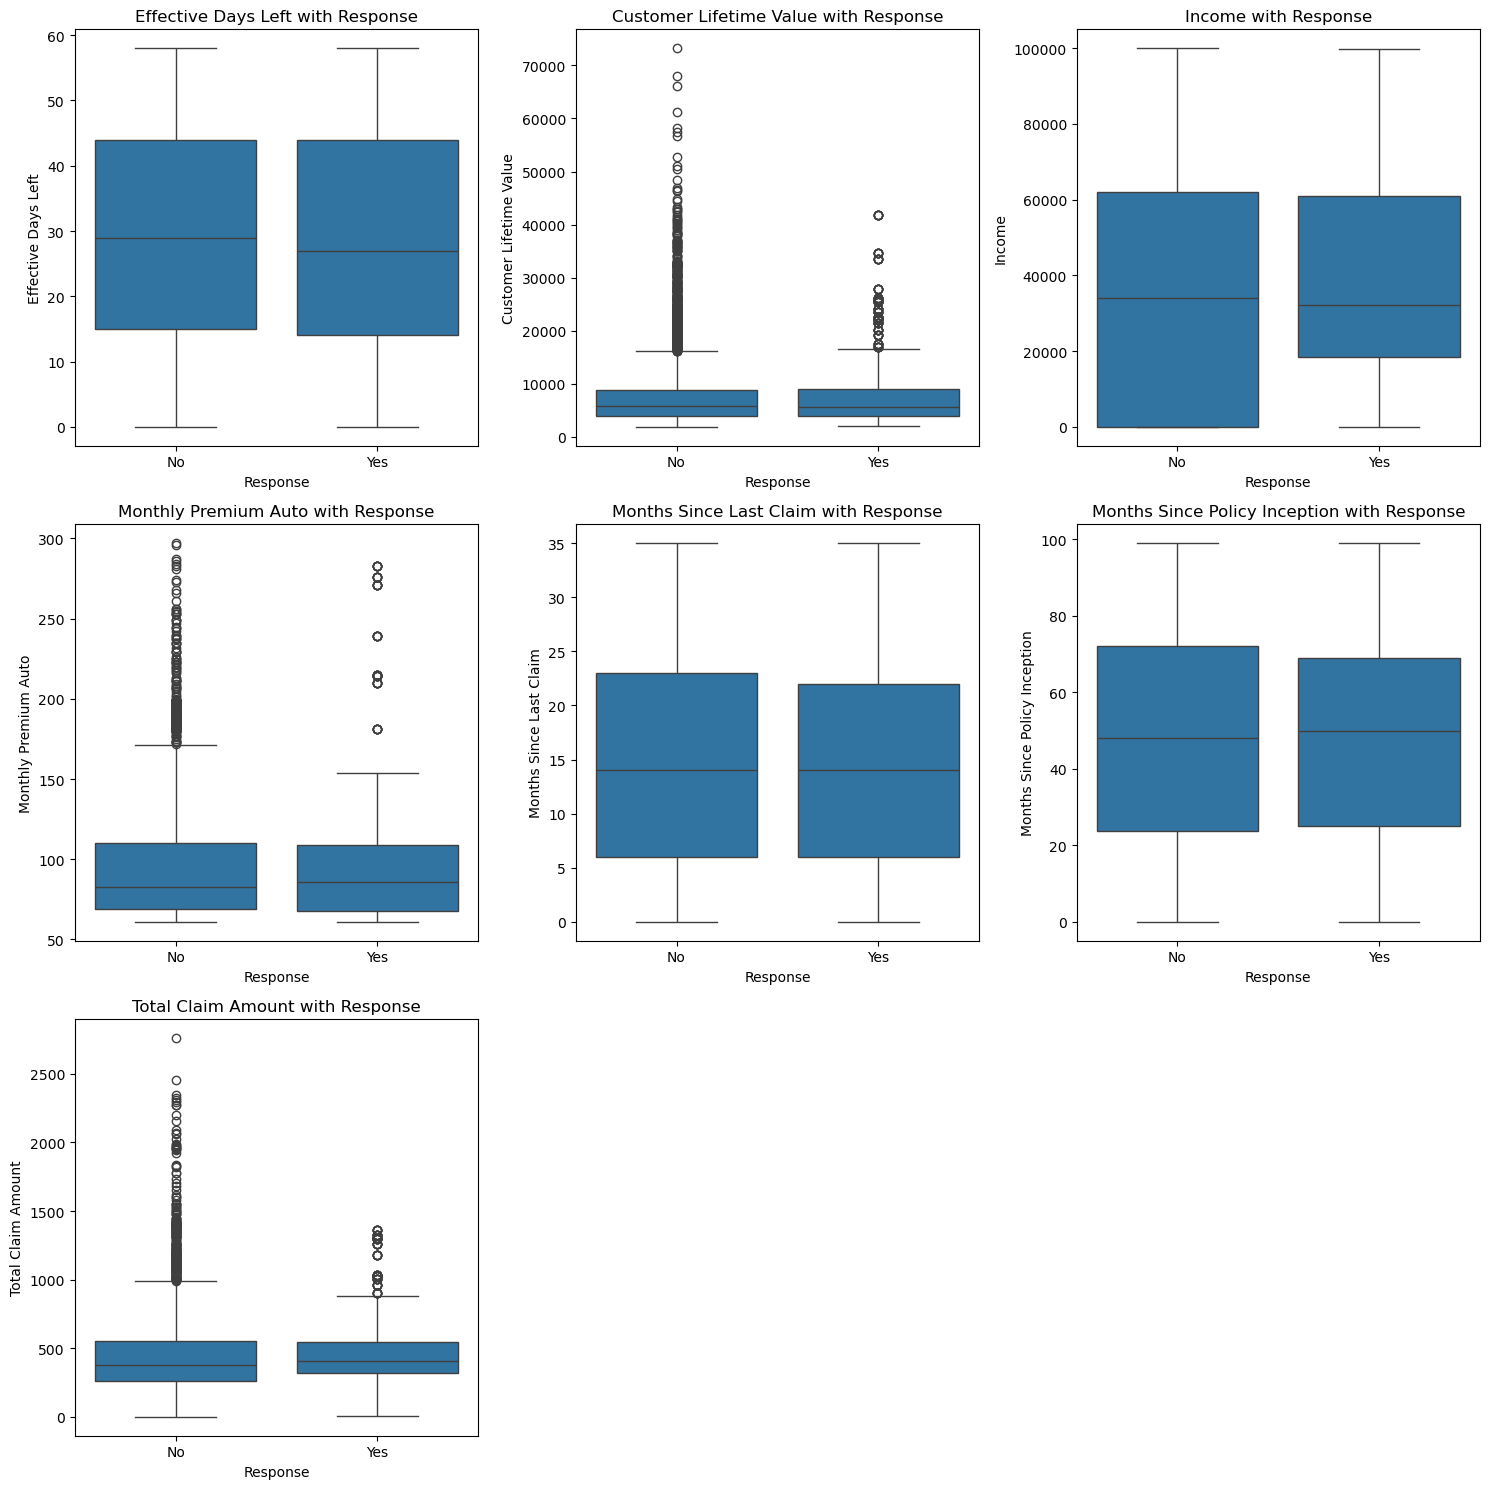

In [58]:
#Mối tương quan giữa các feature categorical với numerical
plt.figure(figsize=(15, 15))
for i, variable in enumerate(numerical_features[:10]):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='Response', y=variable, data= data_balanced)
    plt.title(f"{variable} with Response")
plt.tight_layout()
plt.show()

# Lưu lại dữ liệu sau khi EDA

In [60]:
# Đổi dấu cách thành dấu gạch dưới trong tên cột của data_balanced
data_balanced.columns = data_balanced.columns.str.replace(' ', '_')

# Kiểm tra kết quả
print(data_balanced.columns)

Index(['Customer', 'State', 'Customer_Lifetime_Value', 'Response', 'Coverage',
       'Education', 'Effective_To_Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location_Code', 'Marital_Status', 'Monthly_Premium_Auto',
       'Months_Since_Last_Claim', 'Months_Since_Policy_Inception',
       'Number_of_Open_Complaints', 'Number_of_Policies', 'Policy_Type',
       'Policy', 'Renew_Offer_Type', 'Sales_Channel', 'Total_Claim_Amount',
       'Vehicle_Class', 'Vehicle_Size', 'Effective_Days_Left'],
      dtype='object')


In [61]:
data_balanced.to_csv('EDA_Marketing-Customer-Value-Analysis.csv')